In [16]:
!pip install pandas matplotlib seaborn


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
import pandas as pd
df = pd.read_csv('Heart_Disease_Prediction.csv')
print(df)

     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope 

In [33]:
df.shape
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [34]:
df.head(5)
df.tail(5)
df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [36]:
df.isnull().sum()



,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


In [37]:
df.isnull().any()

,0
Age,False
Sex,False
Chest pain type,False
BP,False
Cholesterol,False
FBS over 120,False
EKG results,False
Max HR,False
Exercise angina,False
ST depression,False


In [38]:
duplicate=df.duplicated().sum()
print(duplicate)

0


In [39]:
duplicates=df.drop_duplicates(inplace=True)
print(duplicates)


None


In [40]:
df['Heart Disease'] = df['Heart Disease'].map({'Absence': 0, 'Presence': 1})
correlation_matrix = df.corr()
print(df.corr())


                              Age       Sex  Chest pain type        BP  \
Age                      1.000000 -0.094401         0.096920  0.273053   
Sex                     -0.094401  1.000000         0.034636 -0.062693   
Chest pain type          0.096920  0.034636         1.000000 -0.043196   
BP                       0.273053 -0.062693        -0.043196  1.000000   
Cholesterol              0.220056 -0.201647         0.090465  0.173019   
FBS over 120             0.123458  0.042140        -0.098537  0.155681   
EKG results              0.128171  0.039253         0.074325  0.116157   
Max HR                  -0.402215 -0.076101        -0.317682 -0.039136   
Exercise angina          0.098297  0.180022         0.353160  0.082793   
ST depression            0.194234  0.097412         0.167244  0.222800   
Slope of ST              0.159774  0.050545         0.136900  0.142472   
Number of vessels fluro  0.356081  0.086830         0.225890  0.085697   
Thallium                 0.106100  0.3

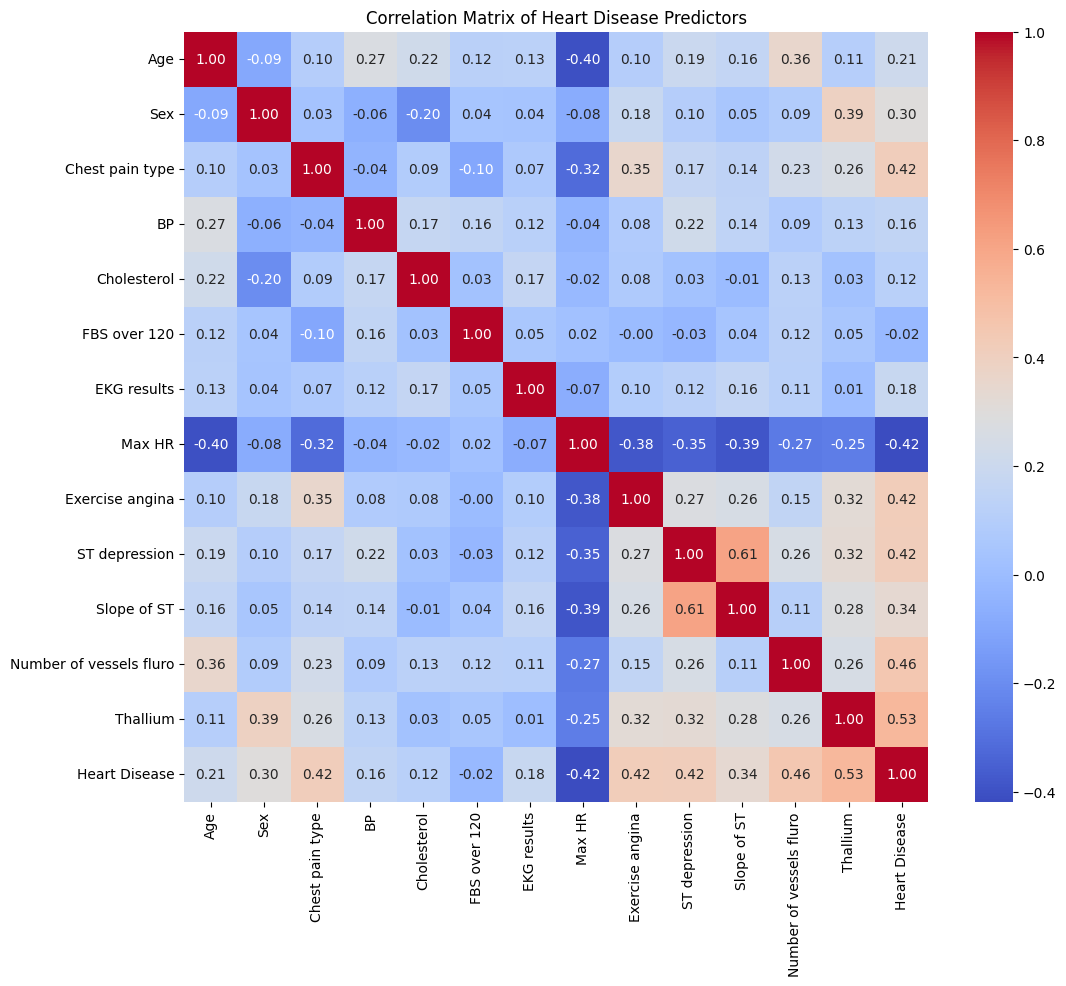

In [41]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Heart Disease Predictors')
plt.show()

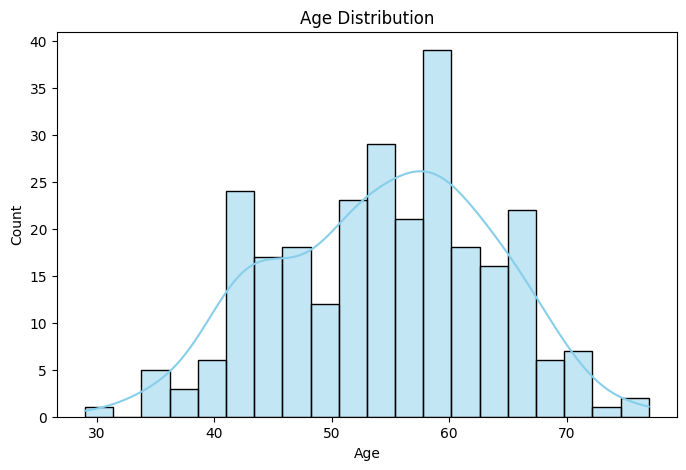

In [42]:

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()

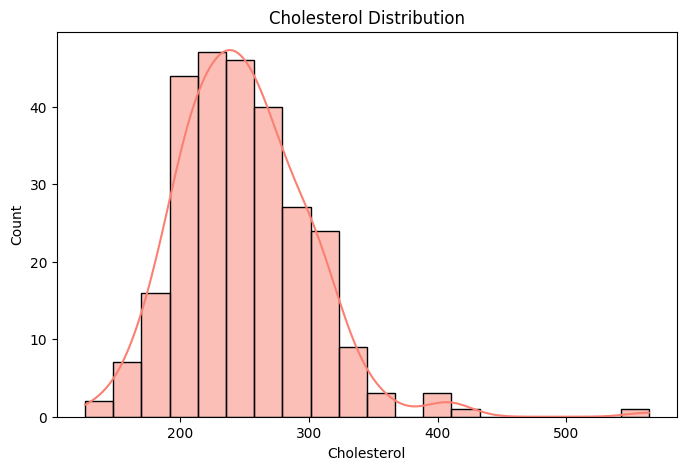

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(df['Cholesterol'], bins=20, kde=True, color='salmon')
plt.title('Cholesterol Distribution')
plt.show()

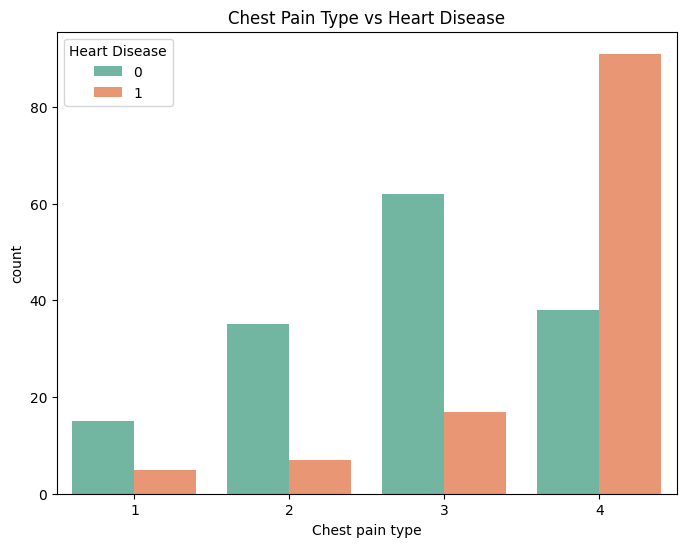

In [44]:
plt.figure(figsize=(8,6))
sns.countplot(x='Chest pain type', hue='Heart Disease', data=df, palette='Set2')
plt.title('Chest Pain Type vs Heart Disease')
plt.show()


/tmp/ipython-input-3151944584.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart Disease', y='BP', data=df, palette='coolwarm')


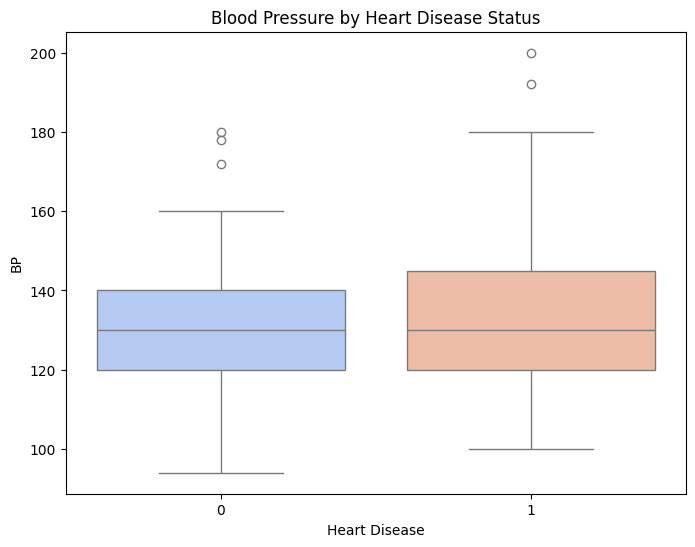

In [45]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Heart Disease', y='BP', data=df, palette='coolwarm')
plt.title('Blood Pressure by Heart Disease Status')
plt.show()


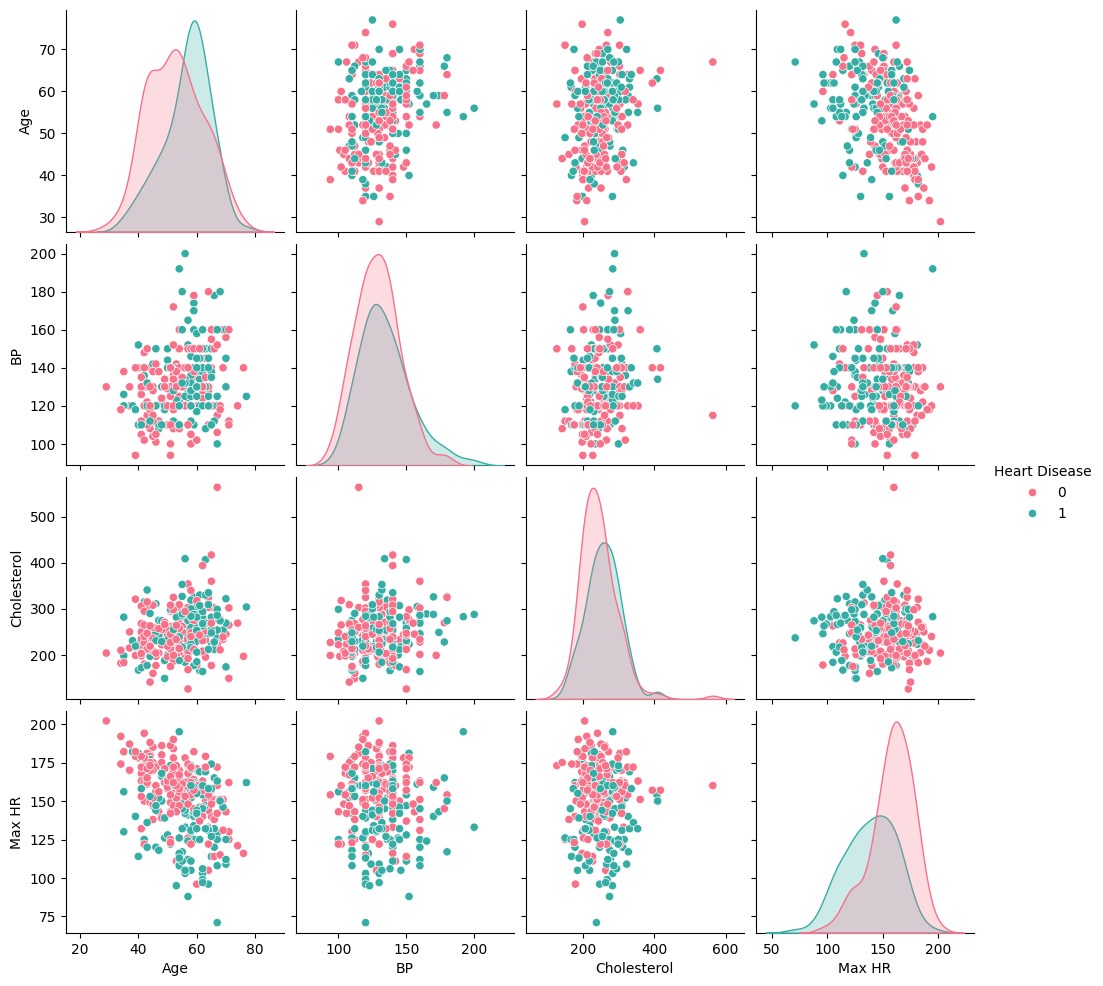

In [46]:
sns.pairplot(df[['Age','BP','Cholesterol','Max HR','Heart Disease']], hue='Heart Disease', palette='husl')
plt.show()


/tmp/ipython-input-421063843.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Exercise angina', y='Heart Disease', data=df, ci=None, palette='muted')
/tmp/ipython-input-421063843.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Exercise angina', y='Heart Disease', data=df, ci=None, palette='muted')


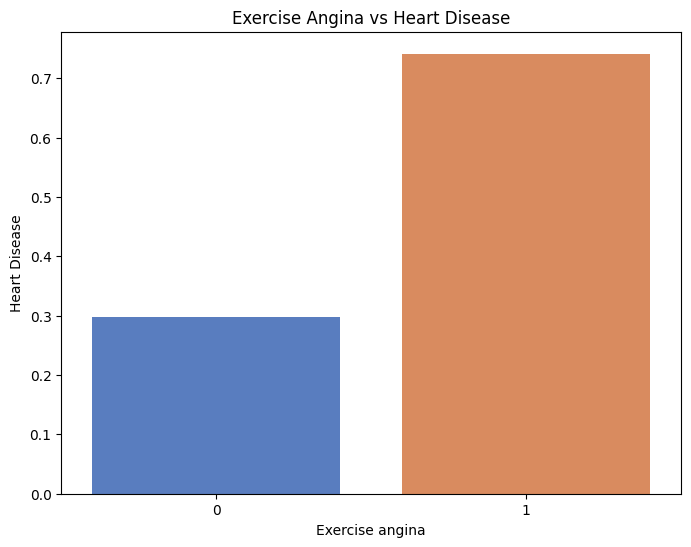

In [47]:
plt.figure(figsize=(8,6))
sns.barplot(x='Exercise angina', y='Heart Disease', data=df, ci=None, palette='muted')
plt.title('Exercise Angina vs Heart Disease')
plt.show()
